In [ ]:
A. In a dataset, we need only the latitude and longitude of each earthquake. Use python code to
extract those two column information and store it in separate list.

In [ ]:
import pandas as pd
df1 = pd.read_csv('/content/1.0_week (2).csv')
print(df1.head())
lats = df1['latitude']
lons = df1['longitude']
lat_list = list(lats)
lon_list = list(lons)
print(lat_list[0:5])
print(lon_list[0:5])

                       time   latitude   longitude   depth   mag magType  \
0  2022-11-17T14:33:29.100Z  19.466833 -155.598007   -2.38  2.00      md   
1  2022-11-17T14:32:38.458Z  60.006000 -139.516000    0.00  1.60      ml   
2  2022-11-17T14:16:07.810Z  17.996833  -67.001000   11.22  1.80      md   
3  2022-11-17T14:08:28.350Z  19.229666 -155.445160   32.68  1.74      md   
4  2022-11-17T14:03:42.776Z  59.921000 -153.183800  111.20  1.90      ml   

    nst    gap     dmin   rms  ...                   updated  \
0  25.0   65.0      NaN  0.36  ...  2022-11-17T14:36:34.740Z   
1   NaN    NaN      NaN  0.91  ...  2022-11-17T14:34:37.518Z   
2   6.0  137.0  0.04935  0.06  ...  2022-11-17T14:34:55.550Z   
3  42.0  114.0      NaN  0.13  ...  2022-11-17T14:11:43.880Z   
4   NaN    NaN      NaN  0.66  ...  2022-11-17T14:16:59.127Z   

                                  place        type horizontalError  \
0  28 km E of Honaunau-Napoopoo, Hawaii  earthquake            0.50   
1          52 km

In [ ]:
!pip install basemap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 863 kB 7.6 MB/s 
     |████████████████████████████████| 30.5 MB 1.3 MB/s 
     |████████████████████████████████| 17.1 MB 41.1 MB/s 
     |████████████████████████████████| 7.8 MB 46.7 MB/s 
     |████████████████████████████████| 46 kB 177 kB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scipy 1.7.3 requires numpy<1.23.0,>=1.16.5, but you have numpy 1.23.5 which is incompatible.


In [ ]:
B. Plot the above set latitude and longitude points in the world map.

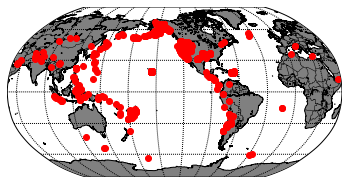

In [ ]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
eq_map = Basemap(projection='robin', resolution = 'l', area_thresh = 1000.0,
              lat_0=0, lon_0=-130)
eq_map.drawcoastlines()
eq_map.drawcountries()
eq_map.fillcontinents(color = 'gray')

eq_map.drawmeridians(np.arange(0, 360, 30))
eq_map.drawparallels(np.arange(-90, 90, 30))

x,y = eq_map(lons, lats)
eq_map.plot(x, y, 'ro', markersize=6)

plt.show()

In [ ]:
C. Read the magnitudes information from the csv file and store it into a list along with the latitudes
and longitudes of each earthquake

In [ ]:
magnitudes = df1['mag']
mag_list = list(magnitudes)
mag_list[0:5]

[2.0, 1.6, 1.8, 1.74000001, 1.9]

In [ ]:
D. Loop through the points and plot them one at a time. When we plot each point, adjust the dot
size according to the magnitude. Since the magnitudes start at 1.0, we can simply use the
magnitude as a scale factor.

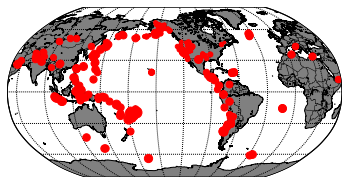

In [ ]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np

eq_map = Basemap(projection='robin', resolution = 'l', area_thresh = 1000.0,
              lat_0=0, lon_0=-130)
eq_map.drawcoastlines()
eq_map.drawcountries()
eq_map.fillcontinents(color = 'gray')
eq_map.drawmapboundary()
eq_map.drawmeridians(np.arange(0, 360, 30))
eq_map.drawparallels(np.arange(-90, 90, 30))

min_marker_size = 1.5
for lon, lat, mag in zip(lons, lats, magnitudes):
  x,y = eq_map(lon, lat)
  msize = mag * min_marker_size
  eq_map.plot(x, y, 'ro', markersize=msize)

plt.show()


In [ ]:
E. Use some different colors to represent the magnitudes as well. Let's make small earthquakes
green, moderate earthquakes yellow, and significant earthquakes red

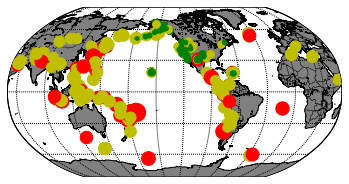

In [ ]:
def get_marker_color(magnitude):
    if magnitude < 3.0:
        return ('go')
    elif magnitude < 5.0:
        return ('yo')
    else:
        return ('ro')
eq_map = Basemap(projection='robin', resolution = 'l', area_thresh = 1000.0,
              lat_0=0, lon_0=-130)
eq_map.drawcoastlines()
eq_map.drawcountries()
eq_map.fillcontinents(color = 'gray')
eq_map.drawmapboundary()
eq_map.drawmeridians(np.arange(0, 360, 30))
eq_map.drawparallels(np.arange(-90, 90, 30))

min_marker_size = 2.5
for lon, lat, mag in zip(lons, lats, magnitudes):
    x,y = eq_map(lon, lat)
    msize = mag * min_marker_size
    marker_string = get_marker_color(mag)
    eq_map.plot(x, y, marker_string, markersize=msize)

plt.show()

In [ ]:
F. Add a title to our map. Our title needs to include the date range for these earthquakes

0       2022-11-17T14:33:29.100Z
1       2022-11-17T14:32:38.458Z
2       2022-11-17T14:16:07.810Z
3       2022-11-17T14:08:28.350Z
4       2022-11-17T14:03:42.776Z
                  ...           
1314    2022-11-10T15:21:22.223Z
1315    2022-11-10T15:05:43.343Z
1316    2022-11-10T14:56:10.682Z
1317    2022-11-10T14:53:39.440Z
1318    2022-11-10T14:42:51.140Z
Name: time, Length: 1319, dtype: object


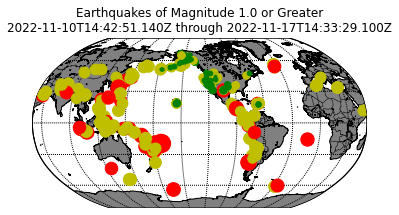

In [ ]:
timestrings = df1['time']
print(timestrings)

from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np

def get_marker_color(magnitude):
    if magnitude < 3.0:
        return ('go')
    elif magnitude < 5.0:
        return ('yo')
    else:
        return ('ro')
eq_map = Basemap(projection='robin', resolution = 'l', area_thresh = 1000.0,
              lat_0=0, lon_0=-130)
eq_map.drawcoastlines()
eq_map.drawcountries()
eq_map.fillcontinents(color = 'gray')
eq_map.drawmapboundary()
eq_map.drawmeridians(np.arange(0, 360, 30))
eq_map.drawparallels(np.arange(-90, 90, 30))

min_marker_size = 2.5
for lon, lat, mag in zip(lons, lats, magnitudes):
    x,y = eq_map(lon, lat)
    msize = mag * min_marker_size
    marker_string = get_marker_color(mag)
    eq_map.plot(x, y, marker_string, markersize=msize)

title_string = "Earthquakes of Magnitude 1.0 or Greater\n"
title_string += "{} through {}".format(timestrings[len(timestrings)-1], timestrings[0])
plt.title(title_string)

plt.show()